CNN using finger component rotations

In [51]:
# Seed value
seed_value = 1

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
seed_value += 1

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
seed_value += 1

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
seed_value += 1

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [52]:
%run ./utils/parseData.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import to_categorical

In [53]:
def GetData(path="./data/", augment=False):
    all_data = read_data(path)
    
    if augment:
        all_data = AugmentData(all_data)
    
    labels = all_data[:, :1]
    data = all_data[:, 8:]
    
    return labels, data

In [54]:
def AugmentData(data):
    augmented_data = np.array(data)
    for i in range(augmented_data.shape[0]):
        for j in range(7, 72):
            random.seed(i * j)
            random_v = random.random()
            augmented_data[i][j] = augmented_data[i][j] + (-1.0 + (random_v * (1.0 + 1.0)))
    full_data = np.concatenate((data, augmented_data), axis=0)
    return full_data

In [55]:
path = "./data/"
labels, data = GetData(path=path, augment=False)

df = pd.DataFrame(data) # for visualising
df

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,122.989521,5.031775,32.396511,154.947733,2.893299,48.086895,145.477856,-8.119449,46.227878,159.286507,...,-67.582787,-125.367848,-72.437172,-50.852973,-96.587422,-79.767570,-67.930081,-70.781021,-70.997175,-87.361629
1,135.335277,22.762292,47.132208,171.382518,45.664967,57.643169,-179.805451,40.565404,84.301659,-141.818159,...,-102.868148,83.136421,15.529929,90.343455,78.789987,5.173831,90.525847,72.386893,-4.364089,104.625646
2,141.891296,28.615349,54.489470,-178.385441,47.452724,69.867222,-175.951196,39.809274,87.187351,-148.173224,...,-109.162265,82.213256,36.904574,89.425871,76.610167,22.542002,89.209393,73.080910,-3.183434,110.232384
3,141.153613,28.042486,53.670653,-179.465062,47.739280,68.566937,-177.858053,40.358214,84.582835,-146.893964,...,-105.087837,83.791429,7.936759,89.145902,79.618323,-2.325866,93.411176,73.203217,-12.320351,108.900585
4,123.134389,5.315064,32.581669,155.111402,2.412084,48.602000,145.787989,-9.715883,45.043492,160.383255,...,-66.555146,-124.152353,-72.004125,-51.785051,-94.026793,-73.783497,-70.421552,-73.377815,-68.075547,-86.260239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,135.454020,22.724844,48.227294,173.072365,43.683977,59.130088,-177.914089,39.844308,87.294136,-140.145342,...,-97.616769,83.652982,8.787120,90.732179,80.799352,-7.743501,96.029729,73.137004,-20.728024,115.463379
540,128.744389,13.280623,38.620488,161.572014,23.452552,50.269780,149.927449,8.234009,40.497087,156.417911,...,-84.608984,-105.300880,-47.951138,-70.866664,-90.733528,-52.498563,-71.883054,-78.529902,-47.744039,-73.490989
541,129.556251,13.566203,39.002209,163.296265,22.926417,51.156175,151.264441,9.823781,42.236421,157.657124,...,-86.134485,-103.704602,-44.729208,-72.633578,-89.587916,-49.534106,-72.849296,-77.996909,-45.906435,-73.415761
542,135.985014,23.082250,49.250932,173.786761,43.665487,60.507197,-178.480080,38.238615,86.171565,-145.289700,...,-97.596604,83.457099,10.082675,89.155861,79.072157,-4.122101,90.756426,73.924881,-14.307162,108.203424


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state= 2, stratify=labels)

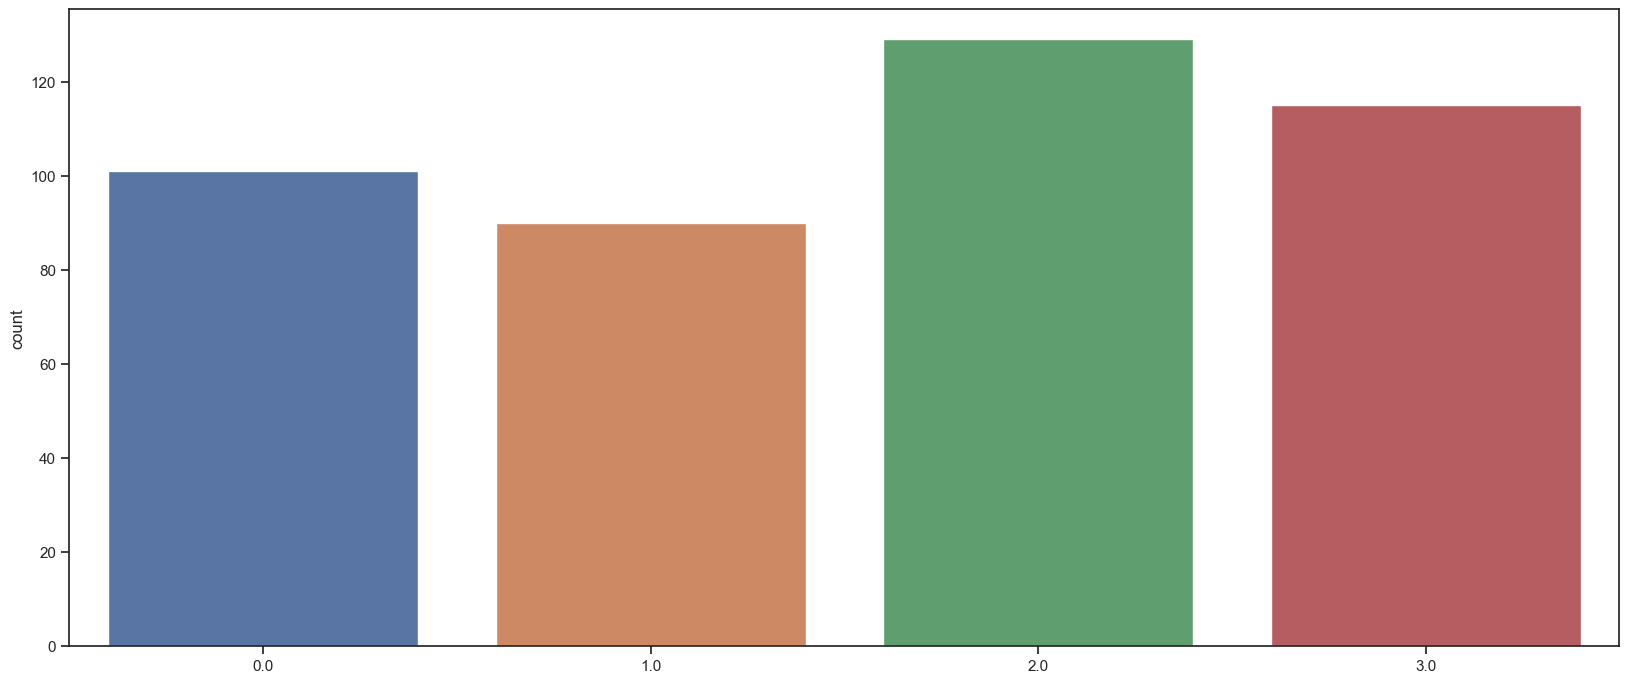

In [57]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("ticks")
_ = sns.countplot(x=y_train.reshape(-1))

In [58]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("")
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (435, 66)
y_train shape: (435, 1)

X_test shape: (109, 66)
y_test shape: (109, 1)


Changing labels shape to categorical: 

In [59]:
y_train[0]

array([0.])

In [60]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [61]:
y_train[0]

array([1., 0., 0., 0.], dtype=float32)

In [62]:
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

y_train shape: (435, 4)
y_test shape: (109, 4)


In [63]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [64]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (435, 66, 1)
X_test shape: (109, 66, 1)


In [65]:
class_mapping = ['thumbs_up','thumbs_down','ok','victory']
num_classes = 4

#2. Creating and training CNN

In [66]:
import keras
from keras import layers  
from keras import models
from keras import callbacks
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [67]:
def create_1D_model():
  model = models.Sequential()

  model.add(layers.Conv1D(32, 3, input_shape=X_train.shape[1:3], activation='relu', ))
  model.add(layers.Conv1D(16, 1, activation='relu', ))
  model.add(layers.Dropout(0.2))
  model.add(layers.MaxPooling1D(pool_size=2))

  model.add(layers.Flatten())

  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(num_classes, activation='softmax'))

  return model

In [68]:
model = create_1D_model()
model.compile(optimizer=keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy', 'Precision', 'Recall'])

In [69]:
MCP = keras.callbacks.ModelCheckpoint('./results/' + 'model_rot.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [70]:
history = model.fit(X_train, y_train, batch_size=32,epochs=100, validation_data=(X_test, y_test),callbacks=[MCP,ES,RLP],verbose=1)

Epoch 1/100
14/14 [==============================] - ETA: 0s - loss: 22.7319 - accuracy: 0.5264 - precision: 0.5258 - recall: 0.5149
Epoch 1: val_accuracy improved from -inf to 0.95413, saving model to ./results\model_rot.h5
14/14 [==============================] - 1s 26ms/step - loss: 22.7319 - accuracy: 0.5264 - precision: 0.5258 - recall: 0.5149 - val_loss: 0.2676 - val_accuracy: 0.9541 - val_precision: 0.9541 - val_recall: 0.9541 - lr: 0.0100
Epoch 2/100
 1/14 [=>............................] - ETA: 0s - loss: 0.4666 - accuracy: 0.7500 - precision: 0.8000 - recall: 0.7500
Epoch 2: val_accuracy improved from 0.95413 to 0.96330, saving model to ./results\model_rot.h5
14/14 [==============================] - 0s 10ms/step - loss: 0.2567 - accuracy: 0.8828 - precision: 0.8949 - recall: 0.8805 - val_loss: 0.1670 - val_accuracy: 0.9633 - val_precision: 0.9633 - val_recall: 0.9633 - lr: 0.0100
Epoch 3/100
 1/14 [=>............................] - ETA: 0s - loss: 0.1587 - accuracy: 0.9375 - 

#3. CNN evaluation

In [71]:
model.evaluate(X_test, y_test, verbose=2)

4/4 - 0s - loss: 0.1670 - accuracy: 0.9633 - precision: 0.9633 - recall: 0.9633 - 23ms/epoch - 6ms/step


[0.16696608066558838, 0.963302731513977, 0.963302731513977, 0.963302731513977]

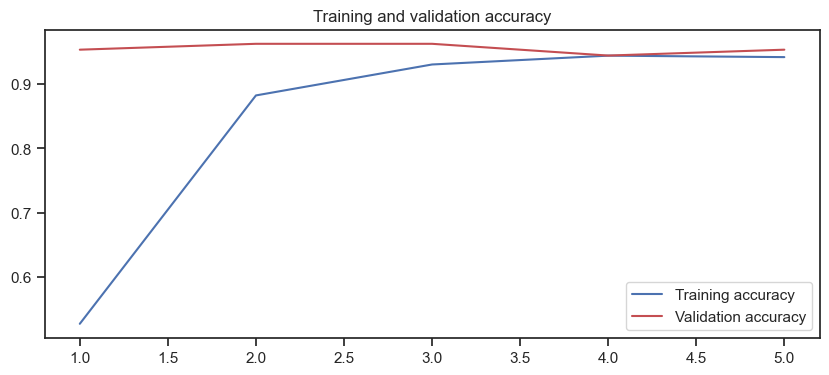

<Figure size 2000x827 with 0 Axes>

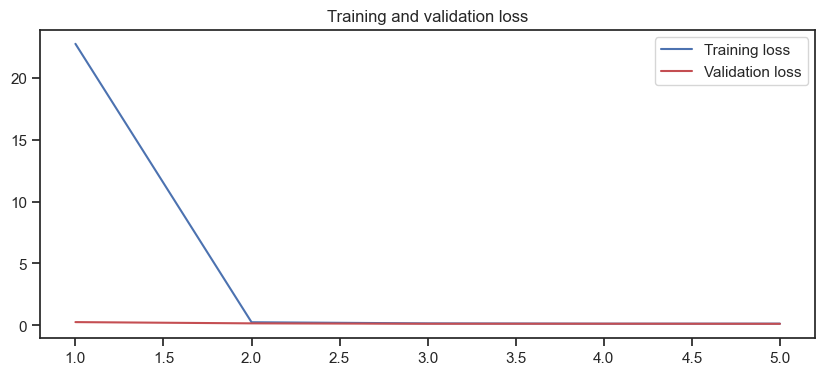

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 4))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend() 
plt.savefig('Training and validation accuracy partial rot.png',dpi=200)
plt.figure()

plt.figure(figsize=(10, 4))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [73]:
predictions = np.argmax(model.predict(X_test), axis=1)
actual = np.argmax(y_test, axis=1)

4/4 [==============================] - 0s 1ms/step


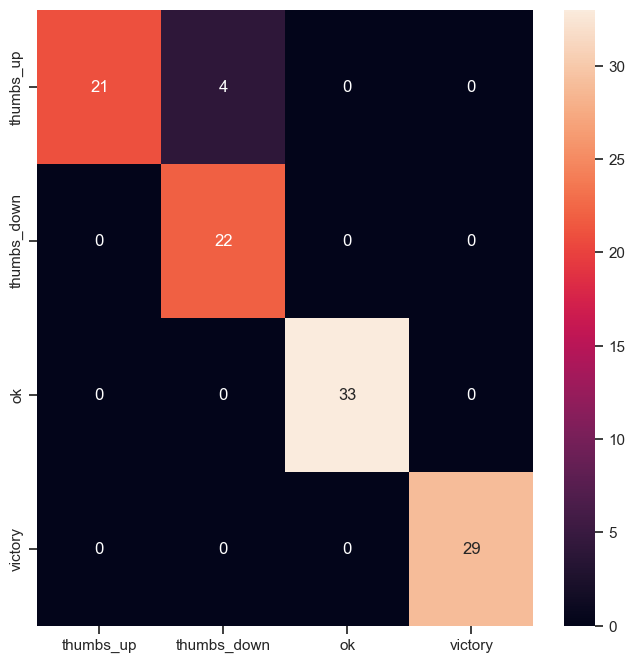

In [74]:
plt.figure(figsize=(8, 8))
cm = confusion_matrix(actual, predictions)
g = sns.heatmap(cm, annot=True, fmt='.0f')
g.set_xticklabels(class_mapping)
g.set_yticklabels(class_mapping)
plt.show()

In [75]:
y_test_temp = np.argmax(y_test, axis=1)
print(classification_report(y_test_temp, predictions))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        25
           1       0.85      1.00      0.92        22
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        29

    accuracy                           0.96       109
   macro avg       0.96      0.96      0.96       109
weighted avg       0.97      0.96      0.96       109

